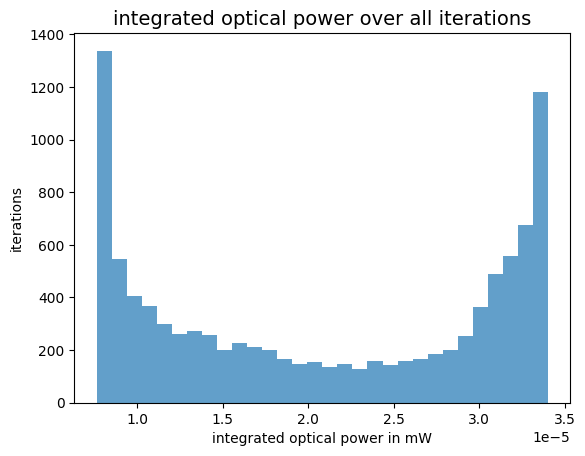

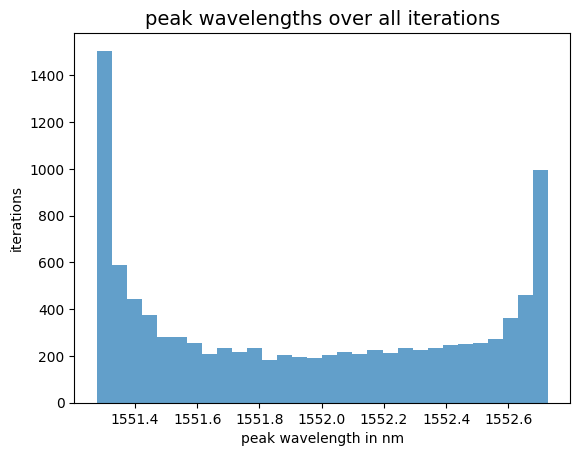

"x = np.linspace(0,iterations-1, iterations) \nplt.plot(x, optical_power, label = 'optical power')  \nplt.title('integrated optical power over all iterations',size = 14)\nplt.xlabel('iterations')\nplt.ylabel('integrated optical power in mW')\nplt.show()\nplt.plot(x, peak_wavelength, label = 'peak wavelength')\nplt.title('peak wavelengths over all iterations',size = 14)\nplt.xlabel('iterations')\nplt.ylabel('peak wavelength in nm')\n\nplt.show()"

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
import pandas as pd 

current_laserdiode = 0.08  #A
current_amplitude = 0.020  #A
current_frequency = 1
voltage_heater = 1         #V
voltage_amplitude = 0.050  #V
voltage_frequency = 1
iterations = 10000
t = np.linspace(0, 10, 1000)
optical_power = np.empty(iterations)
peak_wavelength = np.empty(iterations)


def current_over_time(t, current_laserdiode, current_amplitude, current_frequency):
    return current_laserdiode + current_amplitude * np.sin(2 * np.pi * current_frequency * t)

def voltage_over_time(t, voltage_heater, voltage_amplitude, voltage_frequency):
    return voltage_heater + voltage_amplitude * np.sin(2 * np.pi * voltage_frequency * t)

def get_tck(csv_file, column1, column2, rows):
    df = pd.read_csv(csv_file, nrows = rows)              #erste 9 Datenpunkte
    df.columns = df.columns.str.strip()
    return splrep(df[column1], df[column2])  

def get_curr_volt():
    #np.random.seed(42)
    t_fix = np.random.uniform(0, 10)
    chosen_current = current_over_time(t_fix, current_laserdiode, current_amplitude, current_frequency) *1e3 #jetzt in mA
    chosen_voltage = voltage_over_time(t_fix, voltage_heater, voltage_amplitude, voltage_frequency) 
    return chosen_current, chosen_voltage  

def laseroutput(i, chosen_current, chosen_voltage):
    optical_power[i] = splev(chosen_current, tck_current_power)
    peak_wavelength[i] = splev(chosen_current, tck_current_wavelength) #+ splev(chosen_voltage, tck_voltage_shift)
    return optical_power[i], peak_wavelength[i]


#PROGRAMM

#current_power_data readout
tck_current_power = get_tck('../data/current_power_data.csv', 'Current (mA)', 'Optical Power (mW)', 9)

#voltage_shift_data readout
tck_voltage_shift =  get_tck('../data/voltage_shift_data.csv', 'Voltage (V)', 'Wavelength Shift (nm)', 20)

#current_wavelength_data readout:
tck_current_wavelength =  get_tck('../data/current_wavelength_modified.csv', 'Current (mA)', 'Wavelength (nm)', 9)         #modified sodass mA Werte stimmen (/1000)

for i in range(iterations):
    #get chosen_current and chosen_voltage
    chosen_current, chosen_voltage = get_curr_volt()
   

    #get laseroutput
    optical_power[i], peak_wavelength[i] = laseroutput(i, chosen_current, chosen_voltage)

plt.hist(optical_power, bins=30, label='Optical Power', alpha=0.7)
plt.title('integrated optical power over all iterations',size = 14)
plt.ylabel('iterations')
plt.xlabel('integrated optical power in mW')
plt.show()

plt.hist(peak_wavelength, bins=30, label='Peak Wavelength', alpha=0.7)
plt.title('peak wavelengths over all iterations',size = 14)
plt.ylabel('iterations')
plt.xlabel('peak wavelength in nm')
plt.show()

'''x = np.linspace(0,iterations-1, iterations) 
plt.plot(x, optical_power, label = 'optical power')  
plt.title('integrated optical power over all iterations',size = 14)
plt.xlabel('iterations')
plt.ylabel('integrated optical power in mW')
plt.show()
plt.plot(x, peak_wavelength, label = 'peak wavelength')
plt.title('peak wavelengths over all iterations',size = 14)
plt.xlabel('iterations')
plt.ylabel('peak wavelength in nm')

plt.show()'''



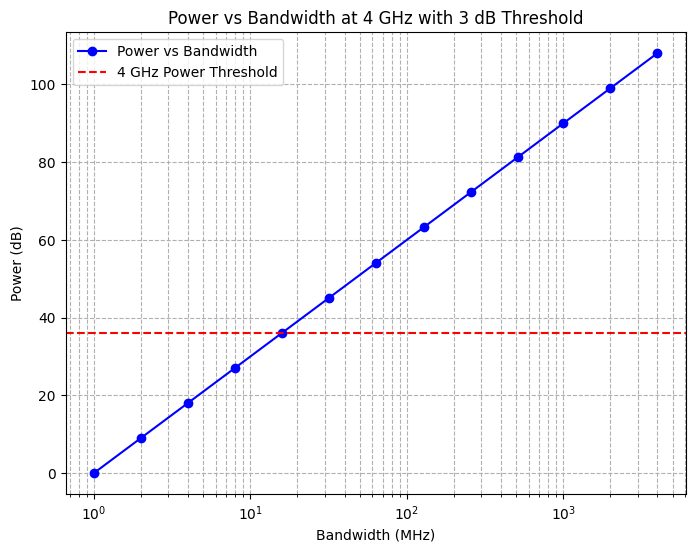

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bandwidth values from 1 MHz to 4 GHz, increasing by a factor of 2
bandwidth = np.array([1e6, 2e6, 4e6, 8e6, 16e6, 32e6, 64e6, 128e6, 256e6, 512e6, 1e9, 2e9, 4e9])

# Calculate the corresponding power in dB (starting at 0 dB for 1 MHz, increasing 3 dB per doubling of bandwidth)
power = 10 * np.log10(bandwidth / 1e6) * 3  # Adjust the scaling

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(bandwidth / 1e6, power, marker='o', linestyle='-', color='b', label="Power vs Bandwidth")
plt.axhline(y=36, color='r', linestyle='--', label='4 GHz Power Threshold')
plt.xscale('log')  # Log scale for bandwidth
plt.yscale('linear')  # Linear scale for power
plt.xlabel("Bandwidth (MHz)")
plt.ylabel("Power (dB)")
plt.title("Power vs Bandwidth at 4 GHz with 3 dB Threshold")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()